<a href="https://colab.research.google.com/github/AbeeraJadoon/Artificial-Intelligence/blob/main/dfs_Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Objective: Implement search algorithms and apply them to solve problems.**

DFS Steps:

**Start at the first city:**

We begin from a specified city, such as Islamabad. We mark it as part of the current path.
**Explore one path as deep as possible:**

From Islamabad, we choose a neighboring city, like Rawalpindi, and continue exploring further from there.
If Rawalpindi has neighbors, we move to the next unvisited neighbor, such as Peshawar.
We keep moving to the next neighbor until we reach the destination city (Karachi), or there are no more neighbors to explore.

**Backtrack if necessary:**

If we reach a city (like Peshawar) that doesn’t lead to the destination or all its neighbors have been explored, we go back (backtrack) to the previous city.
We then try the next unvisited neighbor of the previous city.

**Continue until the destination is found:**

This process of moving forward (exploring) and backward (backtracking) continues until we find a path to the destination (Karachi).

**Store the path:**

Once we reach Karachi, we save this path. DFS doesn’t stop at finding one path—it keeps exploring to find all possible paths.

**Explore all paths:**

DFS will continue searching for alternative paths until all possibilities from the starting city (Islamabad) to the destination (Karachi) have been explored.

All Paths from Islamabad to Karachi:
Islamabad -> Rawalpindi -> Peshawar -> Quetta -> Karachi
Islamabad -> Peshawar -> Quetta -> Karachi
Islamabad -> Lahore -> Multan -> Karachi


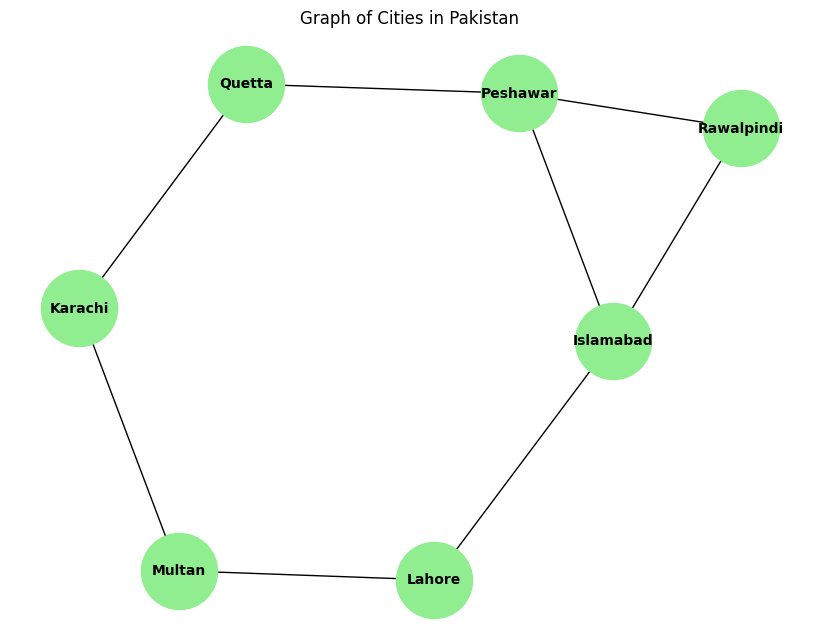

In [1]:
# Importing necessary libraries
import matplotlib.pyplot as plt  # For visualizing the graph
import networkx as nx  # For creating and managing the graph structure

# Depth-First Search (DFS) function
def dfs(graph, start, goal, path=None):
    # Initialize path if it is not provided
    if path is None:
        path = []
    # Add the current start node to the path
    path = path + [start]

    # If the start node is the goal, return the path (we have reached the destination)
    if start == goal:
        return [path]

    # If the start node is not in the graph, return an empty list (invalid node)
    if start not in graph:
        return []

    # List to store all possible paths from start to goal
    paths = []

    # Explore neighbors of the current node
    for neighbor in graph[start]:
        # If the neighbor has not been visited (i.e., not in the current path)
        if neighbor not in path:
            # Recursively perform DFS for the neighbor
            new_paths = dfs(graph, neighbor, goal, path)
            # Add the newly found paths to the list of paths
            for p in new_paths:
                paths.append(p)

    # Return all paths found
    return paths

# Defining a graph of cities in Pakistan (adjacency list representation)
pakistan_cities_graph = {
    'Islamabad': ['Rawalpindi', 'Peshawar', 'Lahore'],
    'Rawalpindi': ['Islamabad', 'Peshawar'],
    'Peshawar': ['Islamabad', 'Rawalpindi', 'Quetta'],
    'Lahore': ['Islamabad', 'Multan'],
    'Multan': ['Lahore', 'Karachi'],
    'Karachi': ['Multan', 'Quetta'],
    'Quetta': ['Peshawar', 'Karachi']
}

# Call the DFS function to find all paths from 'Islamabad' to 'Karachi'
paths = dfs(pakistan_cities_graph, 'Islamabad', 'Karachi')

# Print all possible paths from Islamabad to Karachi
print("All Paths from Islamabad to Karachi:")
for path in paths:
    # Join cities with ' -> ' to format the path for printing
    print(" -> ".join(path))


# Function to plot the graph of cities using NetworkX and Matplotlib
def plot_graph(graph):
    G = nx.Graph()  # Create an empty graph using NetworkX
    # Add edges (connections between cities) to the graph
    for city, neighbors in graph.items():
        for neighbor in neighbors:
            G.add_edge(city, neighbor)  # Add an edge for each neighbor

    # Set the figure size for the plot
    plt.figure(figsize=(8, 6))
    # Use a spring layout to arrange the nodes (cities) in a visually pleasing manner
    pos = nx.spring_layout(G)
    # Draw the graph with labels and visual styling
    nx.draw(G, pos, with_labels=True, node_color='lightgreen', node_size=3000,
            font_size=10, font_weight='bold', edge_color='black')
    # Add a title to the graph
    plt.title("Graph of Cities in Pakistan")
    # Show the graph plot
    plt.show()

# Plot the graph of Pakistan cities using the plot_graph function
plot_graph(pakistan_cities_graph)
